## Auto-sklearn Demonstration (Classification)
Smoke Detection
https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset

In [6]:
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

import pandas as pd
import numpy as np

# To install autosklearn: pip install pyrfr==0.6.1, then pip install auto-sklearn
import autosklearn.classification
from autosklearn.metrics import (accuracy, f1, roc_auc, precision,
                                average_precision, recall, log_loss)

from multi_train import MultiTrain
import matplotlib.pyplot as plt

# import autosklearn

### Data Loading

In [3]:
multi = MultiTrain()

In [4]:
# X_train = pd.read_csv('./data/Titanic/train.csv',index_col='PassengerId')
# y_train = X_train['Survived']

# # One hot encode 'Sex', 'Embarked' cols and remove target col
# X_train = X_train.join(pd.get_dummies(X_train['Sex']))
# X_train = X_train.join(pd.get_dummies(X_train['Embarked']))

# X_train = X_train.drop(['Survived', 'Name', 'Sex', 'Cabin', 'Ticket', 'Embarked'], axis=1)

# multi.X_train = X_train
# multi.y_train = y_train

In [10]:
multi.X_train = pd.read_csv('./data/Smoke/backup/X_train.csv', index_col=[0])
multi.y_train = pd.read_csv('./data/Smoke/backup/y_train.csv', index_col=[0])
multi.X_test = pd.read_csv('./data/Smoke/backup/X_test.csv', index_col=[0])
multi.y_test = pd.read_csv('./data/Smoke/backup/y_test.csv', index_col=[0])

In [12]:
print("X_train:", multi.X_train.shape, "y_train:", multi.y_train.shape)
print("X_test:", multi.X_test.shape, "y_test:", multi.y_test.shape)
multi.X_train.head()

X_train: (8392, 13) y_train: (8392, 1)
X_test: (4134, 13) y_test: (4134, 1)


,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
53090,28.150,43.95,127,400,12797,20594,937.366,1.73,1.80,11.94,1.862,0.042,1948
39120,27.090,47.05,1094,474,12858,19461,938.910,2.08,2.16,14.29,2.228,0.050,14126
14619,14.698,51.48,1136,467,12852,19450,938.888,1.87,1.94,12.86,2.006,0.045,14619
46811,24.920,51.55,1379,406,12957,19383,938.725,1.68,1.75,11.58,1.805,0.041,21817
59190,-2.731,47.28,138,400,12797,20595,937.330,1.88,1.96,12.96,2.020,0.046,2304


### Build and fit a classifier
* **“n_jobs”** - number of cores in the system. (use -1 for as many cores as available).
* **“time_left_for_this_task”** argument for the number of seconds for the process to run.
<br>&emsp;&emsp;("less than 5-10 minutes is probably plenty for many small predictive modeling tasks (sub 1,000 rows).")
* **“per_run_time_limit”** - limit the time allocated to each model evaluation (in seconds).
* **"ensemble_size"** - number of models to include in the ensemble.
* **"metric"** - the metric which we want to optimize

In [16]:
%%time
# initial_configurations_via_metalearning = [0, 2, 4, 8, 16, 32]
initial_configurations_via_metalearning = [4, 8, 16, 32]

resampling_strategies = ['holdout', 'holdout-iterative-fit', 'cv', 'cv-iterative-fit']
max_models_on_disc = [1, 2, 4, 8, 16, 32, 64]
ensemble_sizes = [1, 2, 3, 4, 8, 16]

multi.build_and_fit_classifier(dataset_name="Smoke",
                               initial_configurations_via_metalearning=initial_configurations_via_metalearning,
                               resampling_strategies=resampling_strategies,
                               max_models_on_disc=max_models_on_disc,
                               ensemble_sizes=ensemble_sizes)

-> Fitting - Initial Configurations: 4


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33795 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_initial-confs_4.pkl'
-> Fitting - Initial Configurations: 8


2022-09-17 13:39:09,597 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <zmq.eventloop.ioloop.ZMQIOLoop object at 0x417360ca90>>, <Task finished name='Task-1410402' coro=<Worker.heartbeat() done, defined at /usr/local/lib/python3.8/dist-packages/distributed/worker.py:1129> exception=FileNotFoundError(2, 'No such file or directory')>)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 741, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 765, in _discard_future_result
    future.result()
  File "/usr/local/lib/python3.8/dist-packages/distributed/worker.py", line 1134, in heartbeat
    logger.debug("Heartbeat: %s", self.address)
  File "/usr/lib/python3.8/logging/__init__.py", line 1434, in debug
    self._log(DEBUG, msg, args, **kwargs)
  File "/usr/lib/python3.8/logging/__init__.py", line 1589, in _lo

Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_initial-confs_8.pkl'
-> Fitting - Initial Configurations: 16


2022-09-17 13:49:31,305 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <zmq.eventloop.ioloop.ZMQIOLoop object at 0x417360ca90>>, <Task finished name='Task-1433768' coro=<Worker.heartbeat() done, defined at /usr/local/lib/python3.8/dist-packages/distributed/worker.py:1129> exception=FileNotFoundError(2, 'No such file or directory')>)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 741, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 765, in _discard_future_result
    future.result()
  File "/usr/local/lib/python3.8/dist-packages/distributed/worker.py", line 1131, in heartbeat
    logger.debug("Heartbeat skipped: channel busy")
  File "/usr/lib/python3.8/logging/__init__.py", line 1434, in debug
    self._log(DEBUG, msg, args, **kwargs)
  File "/usr/lib/python3.8/logging/__init__.py", line 1589, in

/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40745 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_initial-confs_16.pkl'
-> Fitting - Initial Configurations: 32


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37195 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_initial-confs_32.pkl'
-> Fitting - Max Models on Disc: 1


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35413 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_max-models_1.pkl'
-> Fitting - Max Models on Disc: 2


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36857 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_max-models_2.pkl'
-> Fitting - Max Models on Disc: 4


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43041 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_max-models_4.pkl'
-> Fitting - Max Models on Disc: 8


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40203 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_max-models_8.pkl'
-> Fitting - Max Models on Disc: 16


2022-09-17 14:42:17,510 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <zmq.eventloop.ioloop.ZMQIOLoop object at 0x417360ca90>>, <Task finished name='Task-1511959' coro=<Worker.heartbeat() done, defined at /usr/local/lib/python3.8/dist-packages/distributed/worker.py:1129> exception=FileNotFoundError(2, 'No such file or directory')>)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 741, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 765, in _discard_future_result
    future.result()
  File "/usr/local/lib/python3.8/dist-packages/distributed/worker.py", line 1131, in heartbeat
    logger.debug("Heartbeat skipped: channel busy")
  File "/usr/lib/python3.8/logging/__init__.py", line 1434, in debug
    self._log(DEBUG, msg, args, **kwargs)
  File "/usr/lib/python3.8/logging/__init__.py", line 1589, in

/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46417 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_max-models_16.pkl'
-> Fitting - Max Models on Disc: 32


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37253 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_max-models_32.pkl'
-> Fitting - Max Models on Disc: 64


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 43797 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_max-models_64.pkl'
-> Fitting - Ensemble Sizes: 1


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34205 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_ensemble-size_1.pkl'
-> Fitting - Ensemble Sizes: 2


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42591 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_ensemble-size_2.pkl'
-> Fitting - Ensemble Sizes: 3


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34389 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_ensemble-size_3.pkl'
-> Fitting - Ensemble Sizes: 4


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36745 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_ensemble-size_4.pkl'
-> Fitting - Ensemble Sizes: 8


2022-09-17 15:20:25,509 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <zmq.eventloop.ioloop.ZMQIOLoop object at 0x40c5870e80>>, <Task finished name='Task-3455' coro=<InProcListener._handle_stream() done, defined at /usr/local/lib/python3.8/dist-packages/distributed/comm/inproc.py:255> exception=FileNotFoundError(2, 'No such file or directory')>)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 741, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 765, in _discard_future_result
    future.result()
  File "/usr/local/lib/python3.8/dist-packages/distributed/comm/inproc.py", line 261, in _handle_stream
    await self.comm_handler(comm)
  File "/usr/local/lib/python3.8/dist-packages/distributed/core.py", line 550, in handle_comm
    logger.debug("Calling into handler %s", handler.__name__)
  File "/usr

Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_ensemble-size_8.pkl'
-> Fitting - Ensemble Sizes: 16


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42277 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_ensemble-size_16.pkl'
-> Fitting - Resampling Strategy: holdout


2022-09-17 16:03:15,973 - tornado.application - ERROR - Exception in callback functools.partial(<bound method IOLoop._discard_future_result of <zmq.eventloop.ioloop.ZMQIOLoop object at 0x40c5870e80>>, <Task finished name='Task-1624206' coro=<Worker.heartbeat() done, defined at /usr/local/lib/python3.8/dist-packages/distributed/worker.py:1129> exception=FileNotFoundError(2, 'No such file or directory')>)
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 741, in _run_callback
    ret = callback()
  File "/usr/local/lib/python3.8/dist-packages/tornado/ioloop.py", line 765, in _discard_future_result
    future.result()
  File "/usr/local/lib/python3.8/dist-packages/distributed/worker.py", line 1134, in heartbeat
    logger.debug("Heartbeat: %s", self.address)
  File "/usr/lib/python3.8/logging/__init__.py", line 1434, in debug
    self._log(DEBUG, msg, args, **kwargs)
  File "/usr/lib/python3.8/logging/__init__.py", line 1589, in _lo

Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_resamp-strategy_holdout.pkl'
-> Fitting - Resampling Strategy: holdout-iterative-fit


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 32821 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_resamp-strategy_holdout-iterative-fit.pkl'
-> Fitting - Resampling Strategy: cv


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35475 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_resamp-strategy_cv.pkl'
-> Fitting - Resampling Strategy: cv-iterative-fit


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33639 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_resamp-strategy_cv-iterative-fit.pkl'
-> Fitting - Resampling Strategy: cv-iterative-fit


/usr/local/lib/python3.8/dist-packages/distributed/node.py:177: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 41819 instead
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


Finished - saved to './models/Smoke/autosklearn/autosklearn_Smoke_resamp-strategy_cv-iterative-fit.pkl'
CPU times: user 3h 20min 10s, sys: 16min 37s, total: 3h 36min 48s
Wall time: 3h 6min 28s


## Visualize 

In [17]:
collected_data = pd.read_csv('./models/smoke/autosklearn/logs/old_log.csv', index_col=[0])
collected_data

,Feature,Value,Elapsed_Time,Train_Score,Test_Score
0,Initial_Confs,0,199.611719,0.994399,0.993953
1,Initial_Confs,2,587.549532,0.999881,0.999758
2,Initial_Confs,4,188.022132,1.000000,1.000000
3,Initial_Confs,8,261.998600,1.000000,1.000000
4,Initial_Confs,16,229.296666,1.000000,1.000000
5,Initial_Confs,32,575.438571,1.000000,1.000000
6,Max_Models,1,175.899320,1.000000,1.000000
7,Max_Models,2,176.881772,1.000000,1.000000
8,Max_Models,4,177.147223,1.000000,1.000000
9,Max_Models,8,177.441443,1.000000,1.000000


In [18]:
initial_confs_df = collected_data[collected_data['Feature'] == 'Initial_Confs']
max_models_df = collected_data[collected_data['Feature'] == 'Max_Models']
ensemble_size_df = collected_data[collected_data['Feature'] == 'Ensemble_Size']
resamp_strategy_df = collected_data[collected_data['Feature'] == 'Resampling_Strategy']

### Initial Configurations Effects

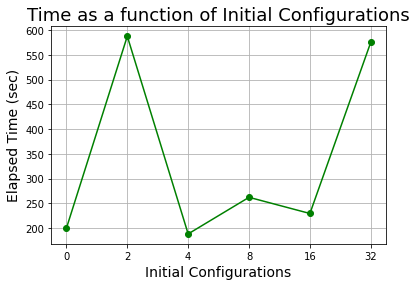

In [19]:
plt.plot(initial_confs_df['Value'], initial_confs_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time as a function of Initial Configurations', fontsize=18)
plt.xlabel('Initial Configurations', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)
plt.show()

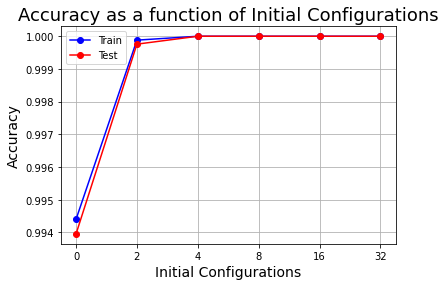

In [20]:
plt.plot(initial_confs_df['Value'], initial_confs_df['Train_Score'], color='blue', marker='o', label='Train')
plt.plot(initial_confs_df['Value'], initial_confs_df['Test_Score'], color='red', marker='o', label='Test')
plt.legend()

plt.title('Accuracy as a function of Initial Configurations', fontsize=18)
plt.xlabel('Initial Configurations', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

### Max Models Effects

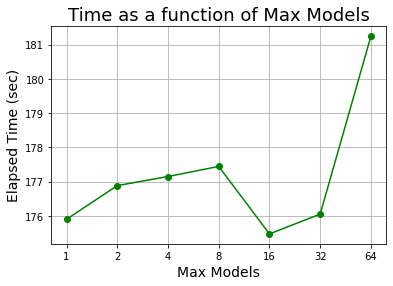

In [21]:
plt.plot(max_models_df['Value'], max_models_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time as a function of Max Models', fontsize=18)
plt.xlabel('Max Models', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)
plt.show()

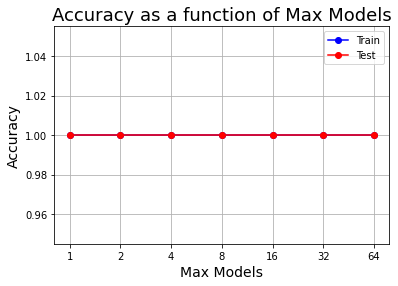

In [22]:
plt.plot(max_models_df['Value'], max_models_df['Train_Score'], color='blue', marker='o', label='Train')
plt.plot(max_models_df['Value'], max_models_df['Test_Score'], color='red', marker='o', label='Test')
plt.legend()

plt.title('Accuracy as a function of Max Models', fontsize=18)
plt.xlabel('Max Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

### Ensemble Size Effects

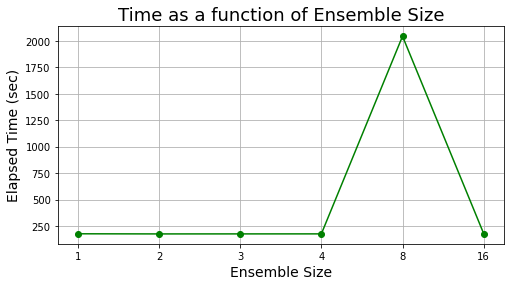

In [23]:
plt.figure(figsize=(8,4))

plt.plot(ensemble_size_df['Value'], ensemble_size_df['Elapsed_Time'], color='green', marker='o')
plt.title('Time as a function of Ensemble Size', fontsize=18)
plt.xlabel('Ensemble Size', fontsize=14)
plt.ylabel('Elapsed Time (sec)', fontsize=14)
plt.grid(True)

plt.show()

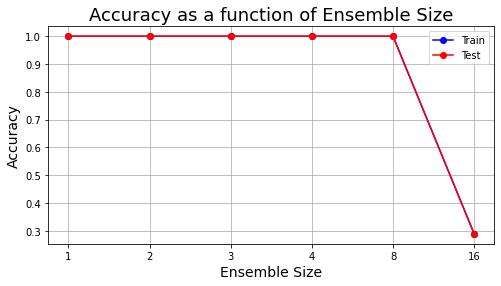

In [24]:
plt.figure(figsize=(8,4))
plt.plot(ensemble_size_df['Value'], ensemble_size_df['Train_Score'], color='blue', marker='o', label='Train')
plt.plot(ensemble_size_df['Value'], ensemble_size_df['Test_Score'], color='red', marker='o', label='Test')
plt.legend()

plt.title('Accuracy as a function of Ensemble Size', fontsize=18)
plt.xlabel('Ensemble Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()

### Remsampling Strategy Effects

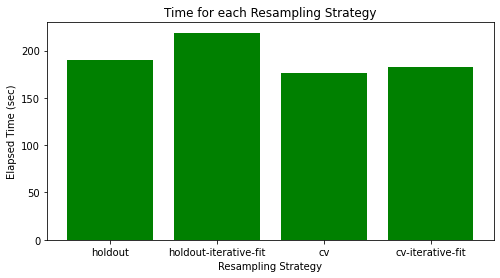

In [25]:
fig = plt.figure(figsize = (8, 4))
 
# creating the bar plot
plt.bar(resamp_strategy_df['Value'], resamp_strategy_df['Elapsed_Time'], color ='green')

plt.xlabel("Resampling Strategy")
plt.ylabel("Elapsed Time (sec)")
plt.title("Time for each Resampling Strategy")
plt.show()

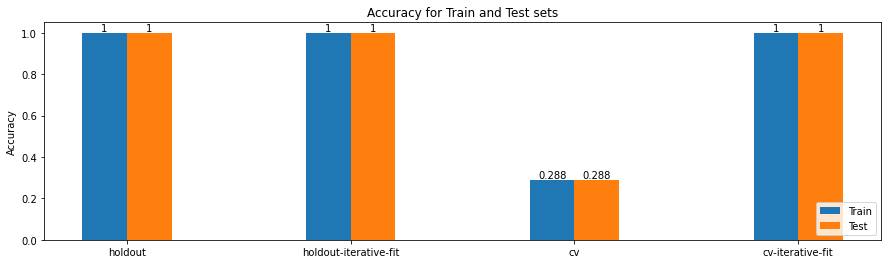

In [27]:
import numpy as np

labels = resamp_strategy_df['Value']
train_score = np.array(resamp_strategy_df['Train_Score']).round(3)
test_score = np.array(resamp_strategy_df['Test_Score']).round(3)

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15,4))
rects1 = ax.bar(x - width/2, train_score, width, label='Train')
rects2 = ax.bar(x + width/2, test_score, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Train and Test sets')
ax.set_xticks(x, labels)
ax.legend(loc='lower right')

ax.bar_label(rects1, padding=0)
ax.bar_label(rects2, padding=0)

plt.show()